<a href="https://colab.research.google.com/github/CaioCesar999/Exerc-cio-KingCounty/blob/main/KingCounty_house_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

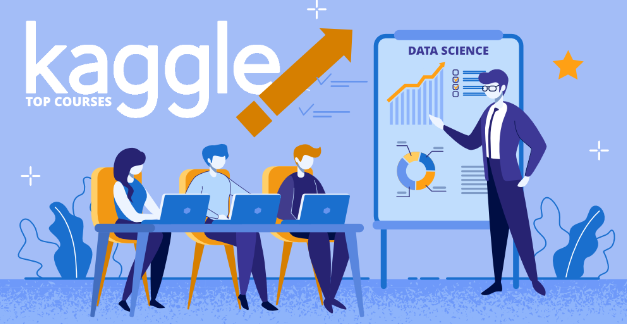

###**King County house data**

As empresas imobiliárias online oferecem avaliações de casas usando técnicas de aprendizado de máquina. O objetivo deste relatório é prever as vendas de casas em King County, Estado de Washington, EUA, usando Regressão Linear Múltipla (MLR). O conjunto de dados consistiu em dados históricos de casas vendidas entre maio de 2014 a maio de 2015. Vamos prever as vendas de casas no Condado de King com uma precisão de pelo menos 75-80% e entender quais fatores são responsáveis ​​pelo maior valor da propriedade - $ 650K e acima.”

O conjunto de dados consiste em preços de casas de King County, uma área no estado americano de Washington, esses dados também abrangem Seattle. O conjunto de dados foi obtido do Kaggle. Esses dados foram publicados/divulgados sob CC0: Domínio Público. O conjunto de dados consistiu em 21 variáveis ​​e 21613 observações.

#Import bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
#Importa arquivos do computador
from google.colab import files
upload = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
#Lê o arquivo importado

df= pd.read_csv("kc_house_data.csv")

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


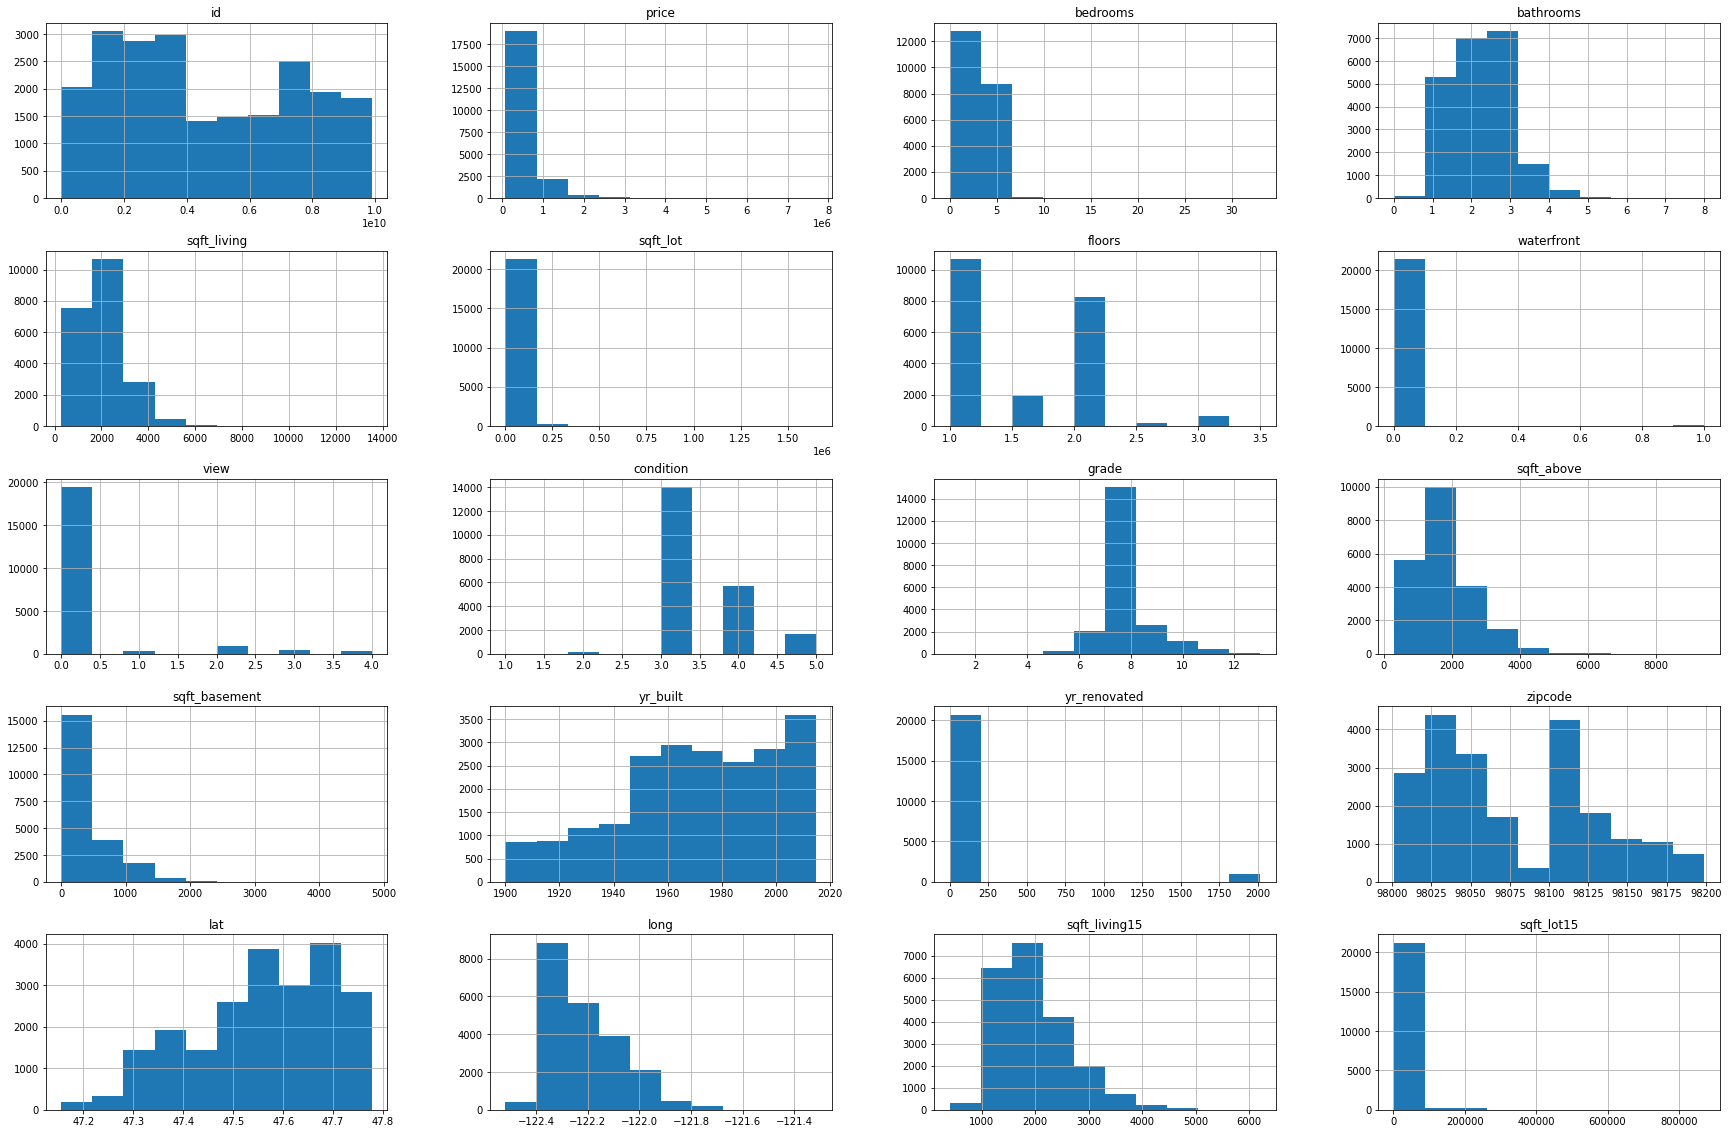

In [6]:
df1.hist(figsize=(30,20))
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


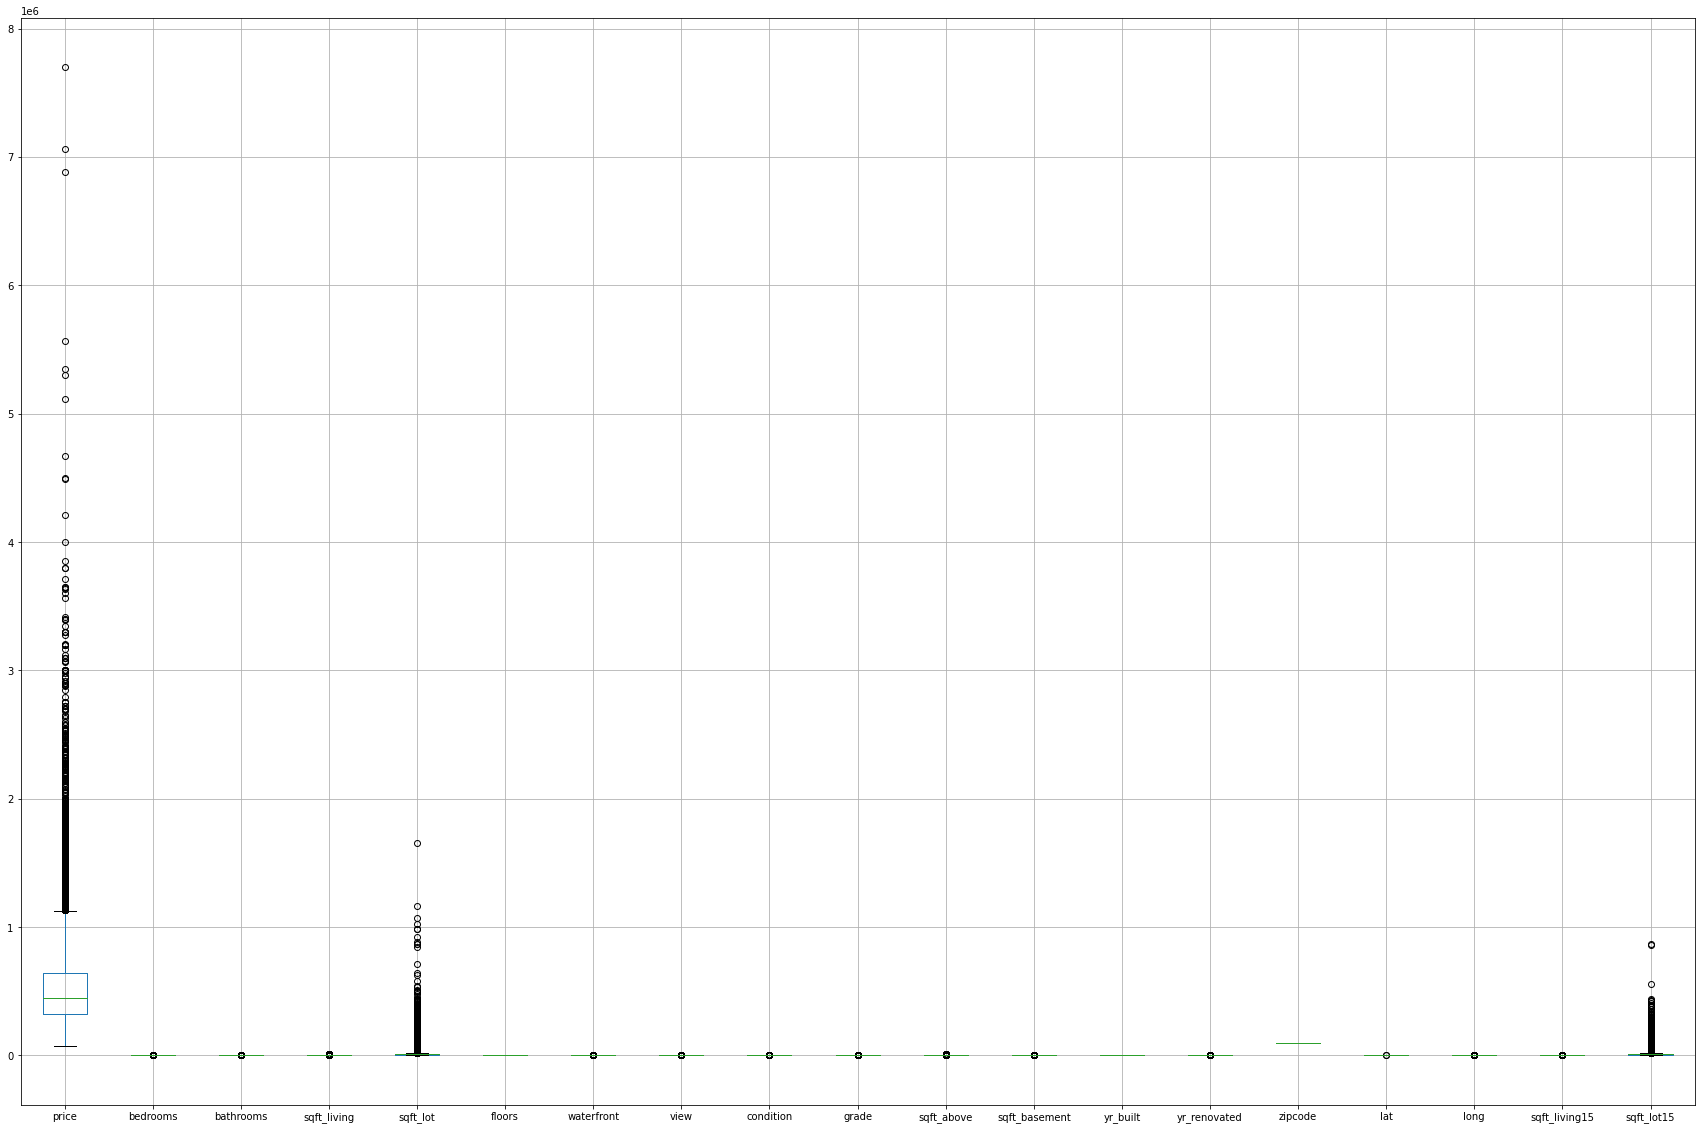

In [7]:
df1.drop(columns = ['id','date']).boxplot(figsize=(30,20))
plt.show()

In [8]:
df1.isnull().sum(axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##Questões

###1- Quantas casas estão disponiveis para compra?

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df1.isnull().sum(axis=0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
df1['date'] = pd.to_datetime(df['date'])

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Resposta: Estão disponíveis 21613 casas para compra. 

###2- Quantos atributos as casas possuem?

In [13]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
df1.columns.value_counts().sum()

21

Resposta: 21 atributos contando com ID

###3- Quais os atributos das casas? 

In [15]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Resposta: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

###4- Qual a casa mais cara?

In [16]:
df1['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [17]:
df1['price'].max()

7700000.0

In [18]:
df1.loc[(df1['price'] == 7700000.0)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800


Resposta: A casa mais cara tem ID 6762700020 e custa R$ 7.700.000,00 dólares.

###5- Qual a casa com maior numero de quartos?


In [19]:
df1['bedrooms'].max()

33

In [20]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
df1.loc[(df1['bedrooms'] == 33)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040.0,580,1947,0,98103,47.6878,-122.331,1330,4700


Rsposta: A casas com maior numero de quartos tem ID 2402100895 e 33 quartos e 

###6- Qual a soma total de quartos do conjunto de dados?

In [22]:
df1['bedrooms'].sum()

72854

Resposta: A soma total do conjunto de quartos é 71854

###7- Quantas casas possuem 2 banheiros?

In [23]:
df1.loc[(df1['bathrooms'] == 2)].shape

(1930, 21)

Resposta: Existem 1930 casas com 2 banheiros

###8- Qual o preço médio de todas as casas no conjunto de dados?

In [24]:
df1['price'].mean()

540088.1417665294

Resposta: O preço médio de todas as casas do conjunto de dados é aproximadamente R$ 540088,00 dólares

###9- Qual o preço médio das casas com 2 banheiros?

In [25]:
df1_twobathrooms = df1.loc[(df1['bathrooms'] == 2)]

In [26]:
df1_twobathrooms['price'].mean()

457889.7186528497

Resposta: O preço médio das casas com 2 banheiros é de aproximadamente R$ 457890,00 dólares

10- Qual o preço minimo entre as casas com 3 quartos?

In [27]:
df1_Q10 = df1.loc[(df1['bathrooms'] == 3)]

In [28]:
df1_Q10['price'].min()

154000.0

O preço minimo para casas com 3 quartos é de R$ 154000,00 dólares

###11- Quantas casasa possuem mais de 300 metros quadrados?

In [29]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
df1.loc[(df1['sqft_basement'] > 300)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21577,3881900317,2015-01-23,579000.0,4,3.25,1900,2631,2.0,0,0,...,9,1250.0,650,2014,0,98144,47.5869,-122.311,1710,4502
21579,7011201004,2014-05-29,645000.0,3,3.25,1730,1229,2.0,0,2,...,9,1320.0,410,2008,0,98119,47.6374,-122.369,1710,1686
21584,952006823,2014-12-02,380000.0,3,2.50,1260,900,2.0,0,0,...,7,940.0,320,2007,0,98116,47.5621,-122.384,1310,1415
21590,7430200100,2014-05-14,1222500.0,4,3.50,4910,9444,1.5,0,0,...,11,3110.0,1800,2007,0,98074,47.6502,-122.066,4560,11063


In [31]:
df1_Q11 =df1.loc[(df1['sqft_basement'] > 300)]

In [32]:
df1_Q11['sqft_basement'].shape

(7331,)

Resposta: Existem 7331 casas com mais de 300 metrs quadrados.

Obs: Para essa questão os calculos foram feitos utilizando o porão como medida de tamanho das casas.

###EDA



In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [34]:
# Convertendo de inteiro para float
df1['bedrooms'] = df1['bedrooms'].astype(float)

In [35]:
df1['bedrooms']= df1['bedrooms'].astype(int)

In [36]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [37]:
df2 = df1.copy()

In [38]:
df2["Nome da coluna"] = 'Caio'

In [39]:
df2["Data nascimento"] = pd.to_datetime('1992-03-02')

In [40]:
df2 = df2.drop(["Nome da coluna"], axis=1)

In [41]:
df2 = df2.drop(["Data nascimento"], axis=1)

In [42]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [43]:
# Selecionando linhas e colunas pelo indice
df2.iloc[0:10,0:5]

,id,date,price,bedrooms,bathrooms
0,7129300520,2014-10-13,221900.0,3,1.00
1,6414100192,2014-12-09,538000.0,3,2.25
2,5631500400,2015-02-25,180000.0,2,1.00
3,2487200875,2014-12-09,604000.0,4,3.00
4,1954400510,2015-02-18,510000.0,3,2.00
5,7237550310,2014-05-12,1225000.0,4,4.50
6,1321400060,2014-06-27,257500.0,3,2.25
7,2008000270,2015-01-15,291850.0,3,1.50
8,2414600126,2015-04-15,229500.0,3,1.00
9,3793500160,2015-03-12,323000.0,3,2.50


In [44]:
df2.loc[0:10,['id','price','date']]

,id,price,date
0,7129300520,221900.0,2014-10-13
1,6414100192,538000.0,2014-12-09
2,5631500400,180000.0,2015-02-25
3,2487200875,604000.0,2014-12-09
4,1954400510,510000.0,2015-02-18
5,7237550310,1225000.0,2014-05-12
6,1321400060,257500.0,2014-06-27
7,2008000270,291850.0,2015-01-15
8,2414600126,229500.0,2015-04-15
9,3793500160,323000.0,2015-03-12


###Voltando para as questões
#Aula 2

1- Qual é a data do imóvel mais antigo no portifólio?

In [45]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
df1[['id','date']].sort_values('date')

,id,date
16768,5561000190,2014-05-02
9596,472000620,2014-05-02
9587,1024069009,2014-05-02
20602,7853361370,2014-05-02
11577,5056500260,2014-05-02
...,...,...
7898,1422700040,2015-05-14
928,8730000270,2015-05-14
5637,7923600250,2015-05-15
13053,5101400871,2015-05-24


Resposta: A data mais antiga é a do imóvel 5561000190 2014-05-02.

2- Quantos imóveis possuem o numero maximo de andares?

In [47]:
df1[['id','floors']]

,id,floors
0,7129300520,1.0
1,6414100192,2.0
2,5631500400,1.0
3,2487200875,1.0
4,1954400510,1.0
...,...,...
21608,263000018,3.0
21609,6600060120,2.0
21610,1523300141,2.0
21611,291310100,2.0


In [48]:
df1['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

Resposta: 8 imóveis possuem o numero maximo de andar que é 3.5

3- Criar uma classificação de imóveis separando-os de baixo padrão e alto padrão, de acordo com o preço.
   
   - Acima de 540.000,00 -> Alto padrão (high_standard)

   - Abaixo de 540.000,00 -> Baixo padrão (low_standard)

In [49]:
df2.loc[df2['price'] > 540000.0, 'Classificação'] = 'high_standard'
df2.loc[df2['price'] <= 540000.0, 'Classificação'] = 'low_standard'
    

In [50]:
df2[['id','price','Classificação']]


,id,price,Classificação
0,7129300520,221900.0,low_standard
1,6414100192,538000.0,low_standard
2,5631500400,180000.0,low_standard
3,2487200875,604000.0,high_standard
4,1954400510,510000.0,low_standard
...,...,...,...
21608,263000018,360000.0,low_standard
21609,6600060120,400000.0,low_standard
21610,1523300141,402101.0,low_standard
21611,291310100,400000.0,low_standard


In [51]:
df2.loc[df2['Classificação'] == 'high_standard'].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Classificação
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930,high_standard
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,...,NaN,1700,1965,0,98007,47.6007,-122.145,2210,8925,high_standard
15,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0,3,...,1980.0,970,1979,0,98126,47.5714,-122.375,2140,4000,high_standard
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0,4,...,2330.0,720,1968,0,98040,47.5316,-122.233,4110,20336,high_standard


4- Crie um relatório ordenado pelo preço e contendo as seguintes informações:

 - id do imóvel
 - data que o imóvel ficou disponivel para compra
 - o numero de quartos
 - o tamanho total do terreno
 - o preço
 - a classificação do imóvel (alto e baixo padrão)

In [52]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Classificação'],
      dtype='object')

In [53]:
df_Q4 = df2.loc[:,['id','date','bedrooms','sqft_lot','price','Classificação']]

In [54]:
dfQ4 = df_Q4.sort_values(['price'], ascending = False)

In [55]:
dfQ4.to_csv('sample_data/report_aula2.csv', index= False)

5- Crie um mapa indicando onde as casas estão localizadas geograficamente.

In [56]:
data_mapa = df2[['id','lat','long','price']]

In [57]:
mapa = px.scatter_mapbox(data_mapa, lat = 'lat' , lon = 'long', hover_name= 'id' , hover_data=['price'] ,color_discrete_sequence=['fuchsia'], zoom = 3, height=300)

In [58]:
mapa.update_layout(mapbox_style = 'open-street-map')
mapa.update_layout(height=600, margin= {'r':0, 't':0, 'l':0, 'b':0})
mapa.show()

#Aula 3


Qual o numero de imóveis por ano de contrução?

In [59]:
df3 = df2.copy()

In [61]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Classificação
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,low_standard
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,low_standard
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,low_standard
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,high_standard
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,low_standard


In [62]:
df3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Classificação'],
      dtype='object')

In [64]:
df3['year'] = pd.DatetimeIndex(df['date']).year

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [109]:
df3[["id", "yr_built"]].groupby("yr_built").count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


2- Qual o menor número de quartos por ano de construção dos imóveis?


In [115]:
df3[["bedrooms", "yr_built"]].groupby("yr_built").min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


3- Qual o preço de compra mais alto por cada número de quarto?

In [119]:
df3[["price", "bedrooms"]].groupby("bedrooms").max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


4- Qual a soma de todos os preços de compra por numero de quartos?

In [122]:
# Cód para tirar notação cientifica 
pd.set_option('display.float_format', lambda x: '%0.3f' %x)

In [123]:
df3[['price','bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.000
1,63210934.000
2,1107788602.000
3,4580263939.000
4,4372957028.000
5,1259346326.000
6,224541613.000
7,36145017.000
8,14366000.000


5- Qual a soma de todos os preços de compra por numero de quartos e banheiros?

In [127]:
df3[['price','bedrooms','bathrooms']].groupby(['bedrooms','bathrooms']).sum()

price
bedrooms bathrooms            
0        0.000     3642600.000
         0.750      265000.000
         1.000      228000.000
         1.500      288000.000
         2.500      899950.000
...                        ...
10       2.000      650000.000
         3.000      660000.000
         5.250     1148000.000
11       3.000      520000.000
33       1.750      640000.000

[144 rows x 1 columns]

In [116]:
df3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Classificação', 'year'],
      dtype='object')

6- Qual o tamanho médio das salas dos imóveis por ano de construção?

In [128]:
df3[['sqft_living','yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.011
1901,1763.621
1902,1919.630
1903,1507.739
1904,1603.178
...,...
2011,2313.685
2012,2378.741
2013,2636.592


7- Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [129]:
df3[['sqft_living','yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.000
1901,1610.000
1902,1600.000
1903,1505.000
1904,1280.000
...,...
2011,2270.000
2012,2237.500
2013,2580.000


8- Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?

In [130]:
df3[['sqft_living','yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.944
1901,668.232
1902,878.659
1903,469.723
1904,1076.871
...,...
2011,804.864
2012,771.430
2013,883.499


9- Como calcular o crescimento médio de preços de compra dos imóveis, por ano, por dia e pela semana do ano?

In [141]:
by_year = df3[['price','year']].groupby('year').sum().reset_index()

<BarContainer object of 2 artists>

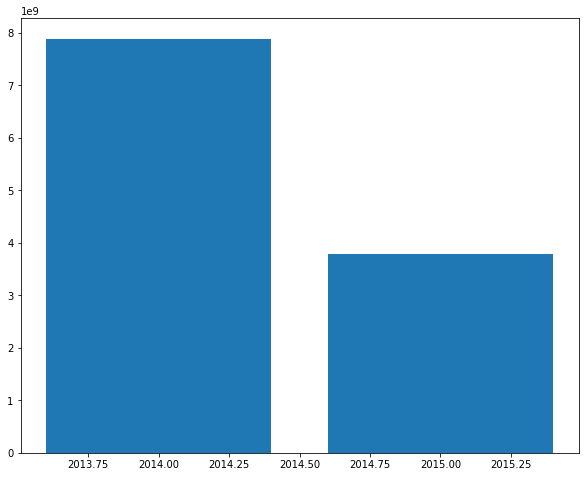

In [142]:
plt.figure(figsize = (10,8))
plt.bar(by_year['year'],by_year['price'])

In [143]:
by_day = df3[['price','date']].groupby('date').mean().reset_index()

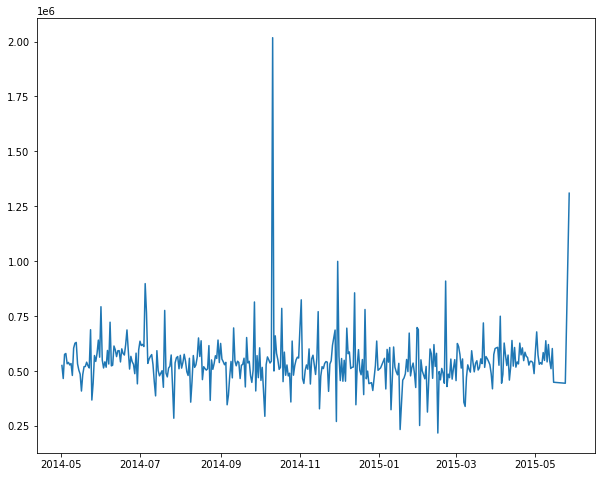

In [146]:
plt.figure(figsize = (10,8))
plt.plot(by_day['date'],by_day['price'])

In [150]:
df3['year_week'] = df3['date'].dt.strftime('%Y-%U') 

In [151]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Classificação,year,year_week
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,1955,0,98178,47.511,-122.257,1340,5650,low_standard,2014,2014-41
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,1951,1991,98125,47.721,-122.319,1690,7639,low_standard,2014,2014-49
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,1933,0,98028,47.738,-122.233,2720,8062,low_standard,2015,2015-08
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,1965,0,98136,47.521,-122.393,1360,5000,high_standard,2014,2014-49
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,1987,0,98074,47.617,-122.045,1800,7503,low_standard,2015,2015-07


In [152]:
by_year_week = df3[['price','year_week']].groupby('year_week').mean().reset_index()

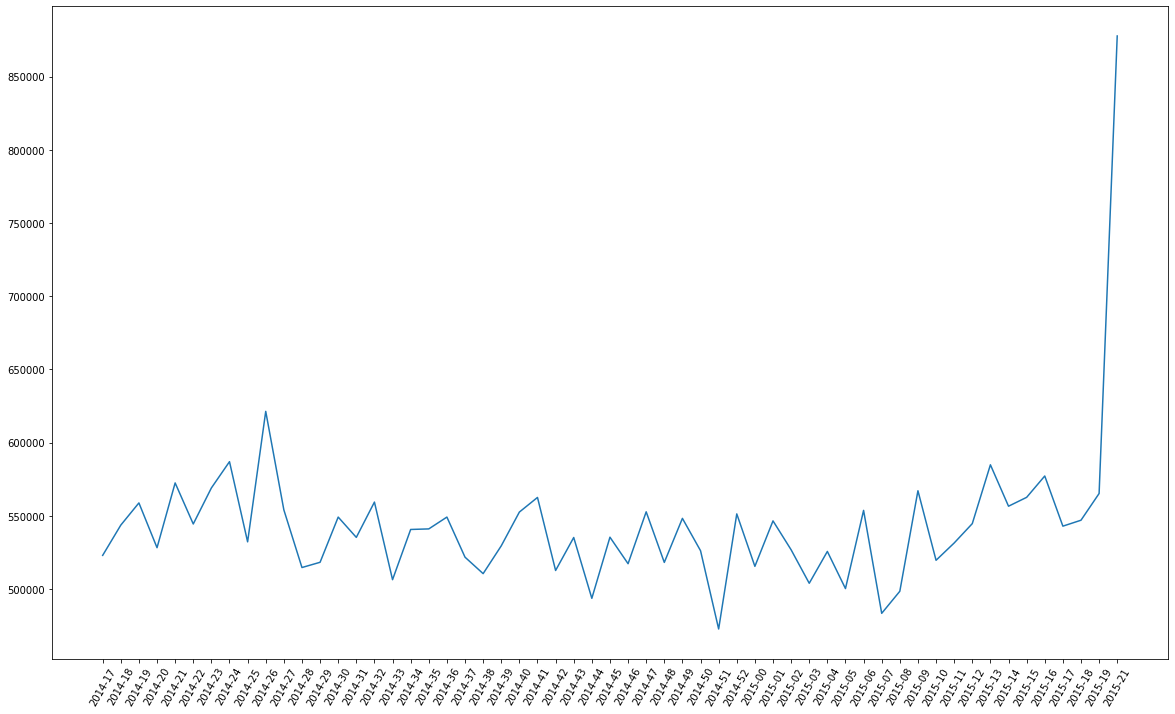

In [157]:
plt.figure(figsize = (20,12))
plt.plot(by_year_week['year_week'],by_year_week['price'])
plt.xticks(rotation = 60);

10- Olhar no mapa e encontrar casas com maior preço.

In [158]:
data_mapa2 = df3[['id','lat','long','price']]

In [162]:
fig = px.scatter_mapbox(data_mapa2, lat = 'lat' , lon = 'long', size= 'price' , color_discrete_sequence=['fuchsia'], size_max = 15, zoom = 10)

In [163]:
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=600, margin= {'r':0, 't':0, 'l':0, 'b':0})
fig.show()

#Novas perguntas do CEO. Ainda aula 3